In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from tensorflow.keras import layers
from keras.layers import Input, add
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from sklearn.preprocessing import MinMaxScaler
import cv2
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from keras.losses import binary_crossentropy
import tensorflow.keras.backend as K
from tensorflow.python.ops.numpy_ops import np_config
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
num_classes = 10
X_train = X_train.astype('float32') / 255 
X_test = X_test.astype('float32') / 255
X_train = np.expand_dims(X_train, -1) # this expands the image's dimensions
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [ ]:
X_train.shape

(60000, 784)

#### 1.latent_space dimension=2

In [ ]:
input_size = 784
hidden_size_1 = 256
hidden_size_2 = 16
bottleneck_size = 2
output_size = 784
x = Input(shape=(input_size,))

# Encoder
Encode_1 = Dense(hidden_size_1, activation='relu')(x)
Encode_2 = Dense(hidden_size_2, activation='relu')(Encode_1)
h = Dense(bottleneck_size, activation='linear')(Encode_2)
encoder_2 = Model(x, h)

# Decoder
encoded_input = Input(shape=(bottleneck_size,))
r = Dense(hidden_size_2, activation='relu')(encoded_input)
Decode_1 = Dense(hidden_size_1, activation='relu')(r)
Decode_2 = Dense(input_size, activation='sigmoid')(Decode_1)
decoder_2 = Model(encoded_input, Decode_2)

full = decoder_2(encoder_2(x))
autoencoder_2 = Model(x, full)
autoencoder_2.compile(optimizer='adam', loss='mae')

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 16)                4112      
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 205,106
Trainable params: 205,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 16)                48        
                                                                 
 dense_4 (Dense)             (None, 256)               4352      
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
Total params: 205,888
Trainable params: 205,888
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 model (Functional)          (None, 2)                 205106    
                                                                 
 model_1 (Functional)        (None, 784)               205888    
                                                                 
Total params: 410,994
Trainable params: 410,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 40
batch_size = 256
history_2 = autoencoder_2.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/40
235/235 [==============================] - 13s 42ms/step - loss: 0.1367 - val_loss: 0.1202
Epoch 2/40
235/235 [==============================] - 9s 38ms/step - loss: 0.1168 - val_loss: 0.1149
Epoch 3/40
235/235 [==============================] - 9s 37ms/step - loss: 0.1122 - val_loss: 0.1111
Epoch 4/40
235/235 [==============================] - 5s 21ms/step - loss: 0.1088 - val_loss: 0.1075
Epoch 5/40
235/235 [==============================] - 5s 21ms/step - loss: 0.1053 - val_loss: 0.1042
Epoch 6/40
235/235 [==============================] - 5s 21ms/step - loss: 0.1021 - val_loss: 0.1002
Epoch 7/40
235/235 [==============================] - 5s 21ms/step - loss: 0.0993 - val_loss: 0.0982
Epoch 8/40
235/235 [==============================] - 5s 20ms/step - loss: 0.0977 - val_loss: 0.0966
Epoch 9/40
235/235 [==============================] - 5s 20ms/step - loss: 0.0964 - val_loss: 0.0955
Epoch 10/40
235/235 [==============================] - 5s 20ms/step - loss: 0.0954 - val_l

In [ ]:
#print loss function for the nn fitting process
def plt_loss(history):
  print(history.history.keys())

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

dict_keys(['loss', 'val_loss'])


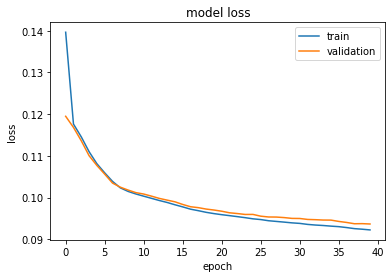

In [ ]:
plt_loss(history_2)

#### 2.latent_space dimension=16

In [ ]:
input_size = 784
hidden_size_1 = 256
hidden_size_2 = 128
bottleneck_size = 16
output_size = 784
x = Input(shape=(input_size,))

# Encoder
Encode_1 = Dense(hidden_size_1, activation='relu')(x)
Encode_2 = Dense(hidden_size_2, activation='relu')(Encode_1)
h = Dense(bottleneck_size, activation='linear')(Encode_2)
encoder_16 = Model(x, h)

# Decoder
encoded_input = Input(shape=(bottleneck_size,))
r = Dense(hidden_size_2, activation='relu')(encoded_input)
Decode_1 = Dense(hidden_size_1, activation='relu')(r)
Decode_2 = Dense(input_size, activation='sigmoid')(Decode_1)
decoder_16 = Model(encoded_input, Decode_2)

full = decoder_16(encoder_16(x))
autoencoder_16 = Model(x, full)
autoencoder_16.compile(optimizer='adam', loss='mae')

In [ ]:
autoencoder_16.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 model_9 (Functional)        (None, 16)                235920    
                                                                 
 model_10 (Functional)       (None, 784)               236688    
                                                                 
Total params: 472,608
Trainable params: 472,608
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_16 = autoencoder_16.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/40
235/235 [==============================] - 2s 7ms/step - loss: 0.1352 - val_loss: 0.1148
Epoch 2/40
235/235 [==============================] - 1s 6ms/step - loss: 0.1044 - val_loss: 0.0959
Epoch 3/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0898 - val_loss: 0.0859
Epoch 4/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0820 - val_loss: 0.0794
Epoch 5/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0772 - val_loss: 0.0758
Epoch 6/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0741 - val_loss: 0.0732
Epoch 7/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0718 - val_loss: 0.0707
Epoch 8/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0698 - val_loss: 0.0693
Epoch 9/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0686 - val_loss: 0.0680
Epoch 10/40
235/235 [==============================] - 2s 7ms/step - loss: 0.0675 - val_loss: 0.0672

3.latent_space dimension=256

In [ ]:
input_size = 784
hidden_size_1 = 512
bottleneck_size = 256
output_size = 784
x = Input(shape=(input_size,))

# Encoder
Encode_1 = Dense(hidden_size_1, activation='relu')(x)
h = Dense(bottleneck_size, activation='linear')(Encode_1)
encoder_256 = Model(x, h)

# Decoder
encoded_input = Input(shape=(bottleneck_size,))
r = Dense(hidden_size_1, activation='relu')(encoded_input)
Decode_1 = Dense(input_size, activation='sigmoid')(r)
decoder_256 = Model(encoded_input, Decode_1)

full = decoder_256(encoder_256(x))
autoencoder_256 = Model(x, full)
autoencoder_256.compile(optimizer='adam', loss='mae')

In [ ]:
autoencoder_256.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 784)]             0         
                                                                 
 model_20 (Functional)       (None, 256)               533248    
                                                                 
 model_21 (Functional)       (None, 784)               533776    
                                                                 
Total params: 1,067,024
Trainable params: 1,067,024
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_256 = autoencoder_256.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/40
235/235 [==============================] - 2s 7ms/step - loss: 0.1280 - val_loss: 0.1160
Epoch 2/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0948 - val_loss: 0.0742
Epoch 3/40
235/235 [==============================] - 2s 6ms/step - loss: 0.0636 - val_loss: 0.0539
Epoch 4/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0509 - val_loss: 0.0484
Epoch 5/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0464 - val_loss: 0.0456
Epoch 6/40
235/235 [==============================] - 2s 6ms/step - loss: 0.0436 - val_loss: 0.0419
Epoch 7/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0413 - val_loss: 0.0407
Epoch 8/40
235/235 [==============================] - 2s 6ms/step - loss: 0.0406 - val_loss: 0.0406
Epoch 9/40
235/235 [==============================] - 2s 6ms/step - loss: 0.0398 - val_loss: 0.0392
Epoch 10/40
235/235 [==============================] - 1s 6ms/step - loss: 0.0386 - val_loss: 0.0379

### Plot reconstructed images under different latent space

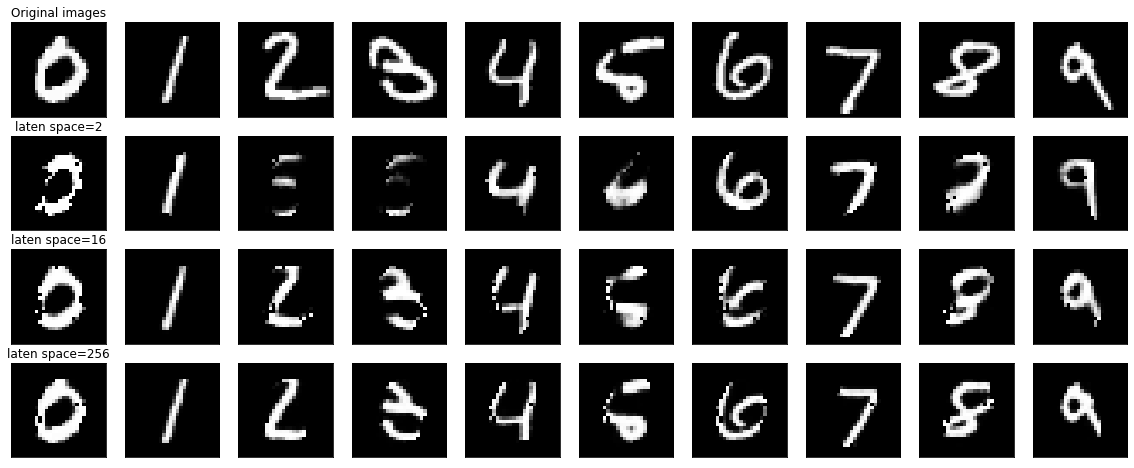

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
reconstructed_imgs_2 = autoencoder_2.predict(X_test)
reconstructed_imgs_16 = autoencoder_16.predict(X_test)
reconstructed_imgs_256 = autoencoder_256.predict(X_test)
def plot_image(data):
    plt.imshow(data.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
for i in range(n):
    # display original
    index=0
    for index in range(len(y_test)):
      if y_test[index]==i:
        ax = plt.subplot(4, n, i+1)
        plot_image(X_test[index])
        if i==0:ax.set_title('Original images')

        #display reconstruction image of laten space=2
        ax = plt.subplot(4, n, i+n+1)
        plot_image(reconstructed_imgs_2[index])
        if i==0:ax.set_title('laten space=2')

        #display reconstruction image of laten space=16
        ax = plt.subplot(4, n, i+2*n+1)
        plot_image(reconstructed_imgs_16[index])
        if i==0:ax.set_title('laten space=16')

        #display reconstruction image of laten space=256
        ax = plt.subplot(4, n, i+3*n+1)
        plot_image(reconstructed_imgs_256[index])
        if i==0:ax.set_title('laten space=256')
        break

plt.show()

#### 2D plot of the latent space for different digits for latent space of 2D

In [ ]:
#creat new x_test data with color border for different digit
(a, y_a), (b, y_b) = mnist.load_data()
x_test_with_border=[]
color = [(0,0,255),(0,255,0),(255,0,0),(255,255,0),(255,0,255),(0,139,139),(84,139,84),(139,134,78),(160,32,240),(255,99,71)]
for i in range(len(b)):
  img=cv2.cvtColor(b[i],cv2.COLOR_GRAY2RGB)
  img =cv2.rectangle(img, (0, 0), (27, 27),color[y_b[i]], thickness=1)
  x_test_with_border.append(img)


In [ ]:
def plot_embedding(data):
    scaler = MinMaxScaler()
    scaler.fit_transform(data)
    fig = plt.figure(figsize=(20, 20))
    ax = plt.subplot(111)
    ax.scatter(data[:, 0], data[:, 1]) 
    for i in range(data.shape[0]):
      ab = AnnotationBbox(OffsetImage(x_test_with_border[i]), (data[i, 0], data[i, 1]), frameon=False)
      ax.add_artist(ab)
    return fig

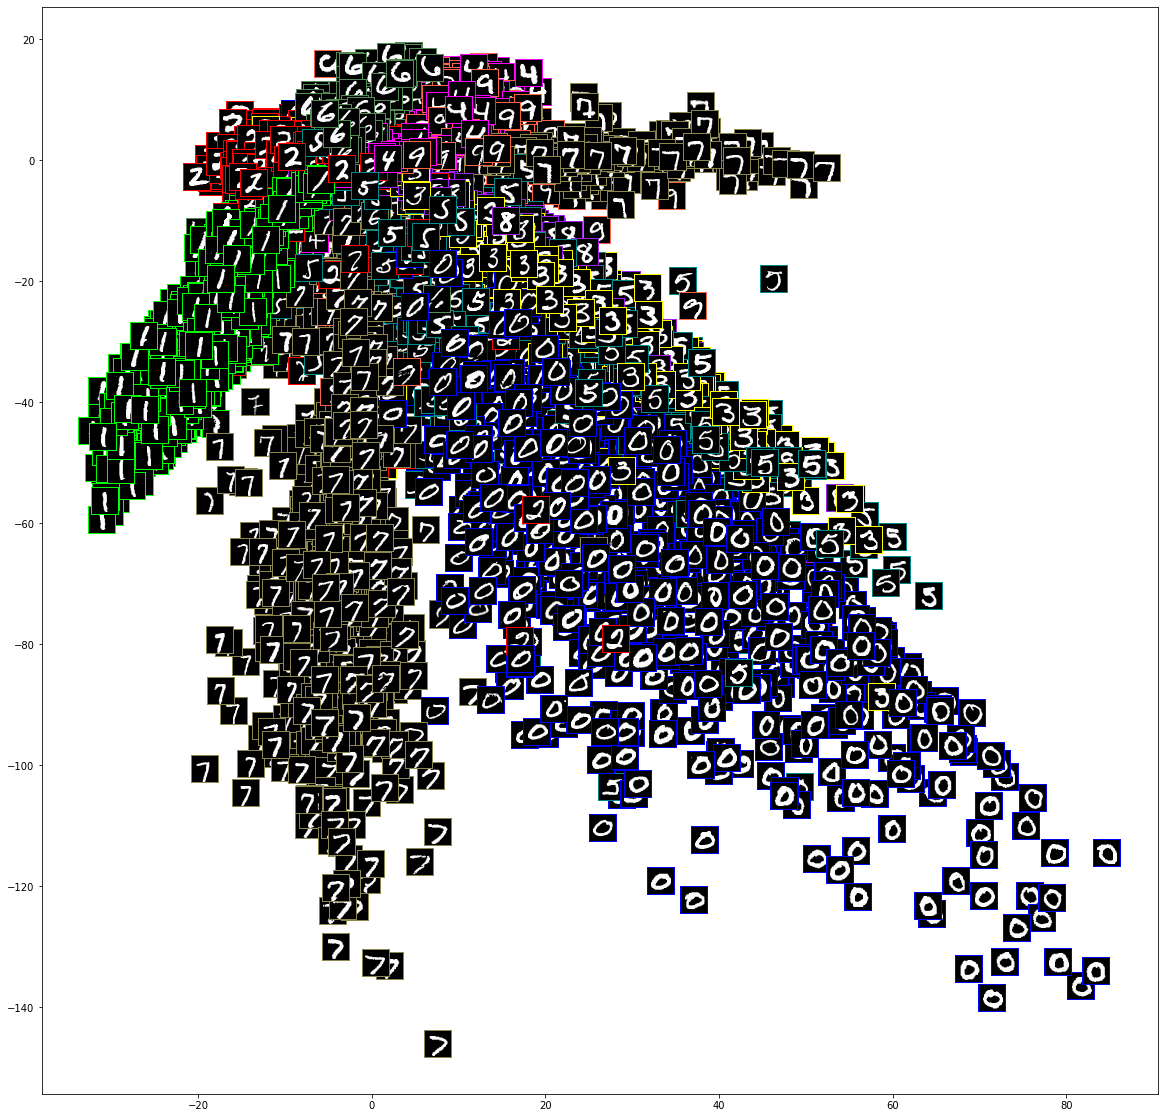

In [ ]:
encoded_imgs_2=encoder_2(X_test)
fig = plot_embedding(encoded_imgs_2)
plt.show(fig)

3.K-means clustering for latent space of dimensions 16,256

In [ ]:
#latent space dimension=16
model_16 = KMeans(n_clusters = 10, random_state=23)
encoded_imgs_16=encoder_16(X_test)
model_16.fit(encoded_imgs_16)

KMeans(n_clusters=10, random_state=23)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


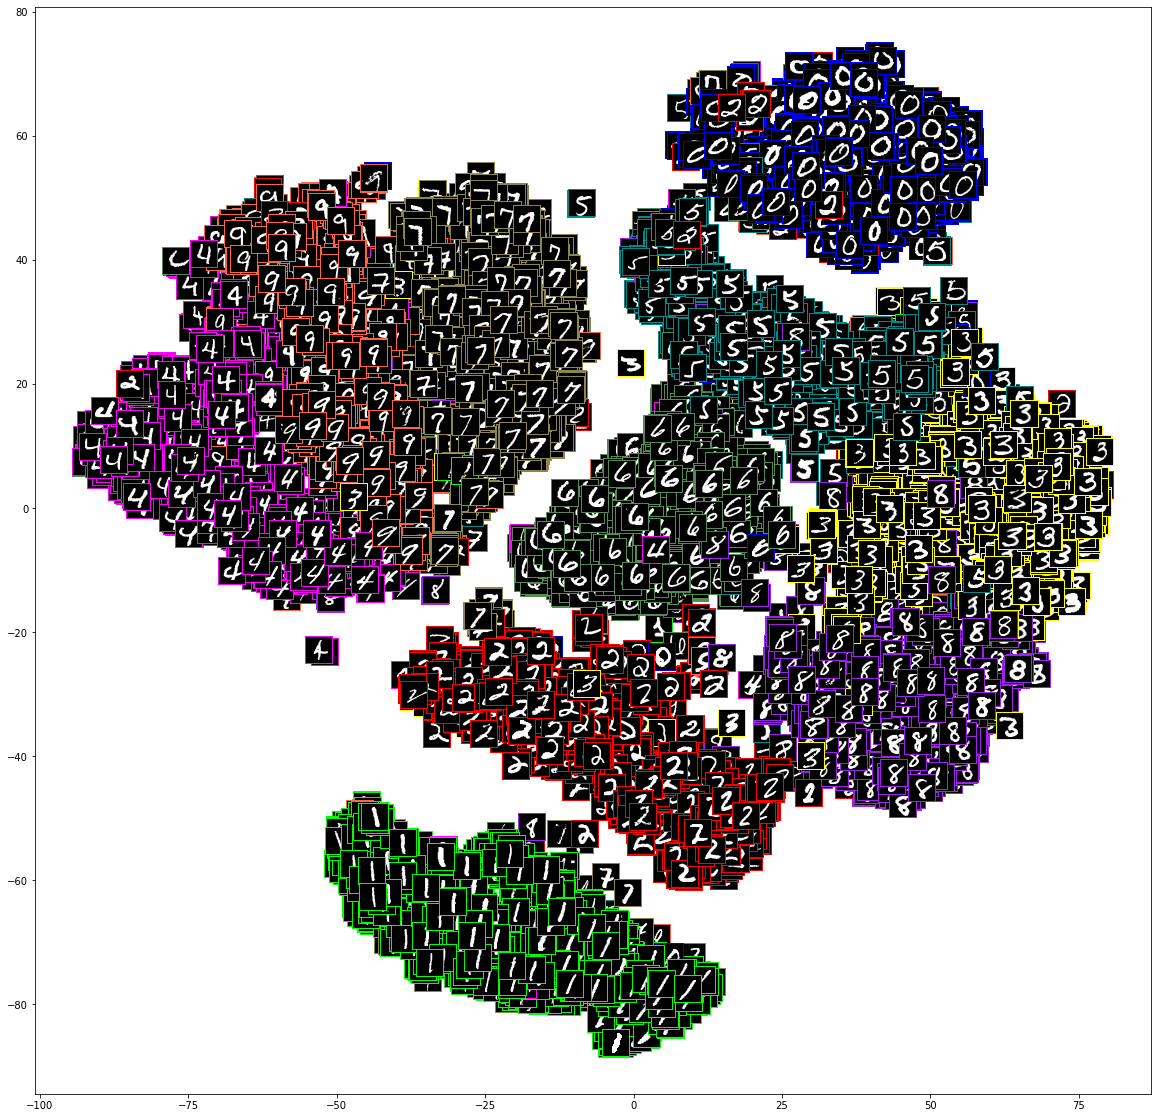

In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_out = pd.DataFrame(encoded_imgs_16,index=model_16.labels_)
result = tsne.fit_transform(X_out)
fig = plot_embedding(result)
plt.show(fig)

In [ ]:
#latent space dimension=256
model_256 = KMeans(n_clusters = 10, random_state=23)
encoded_imgs_256=encoder_256(X_test)
model_256.fit(encoded_imgs_256)

KMeans(n_clusters=10, random_state=23)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


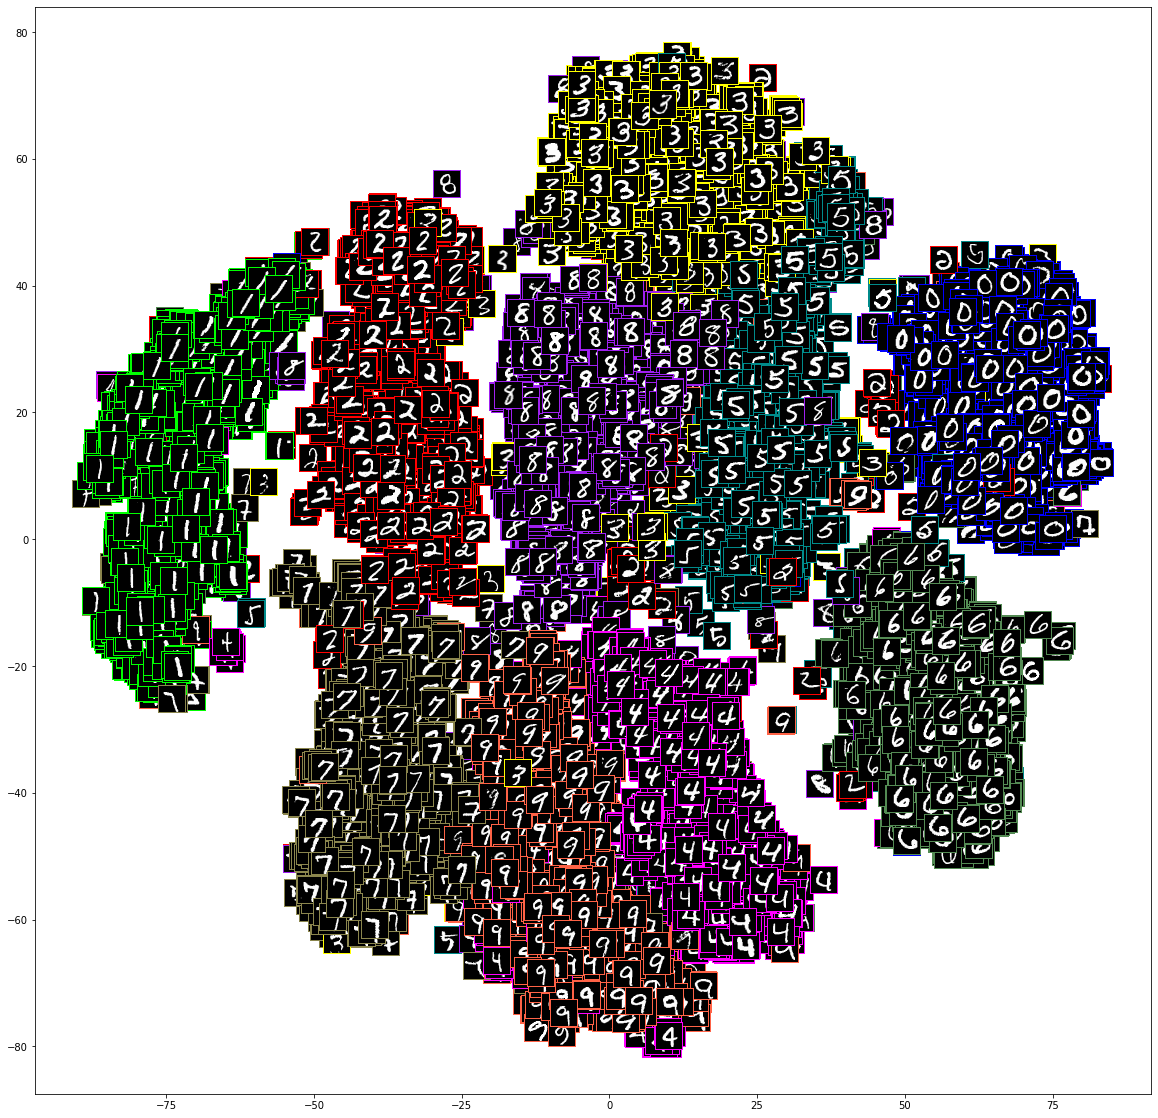

In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_out = pd.DataFrame(encoded_imgs_256,index=model_256.labels_)
result = tsne.fit_transform(X_out)
fig = plot_embedding(result)
plt.show(fig)

Q2 2

In [1]:
#blur image
def blur_img(image):
  kernel_size = (5,5);
  sigma = 50;
  img = cv2.GaussianBlur(image, kernel_size, sigma);
  return img

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


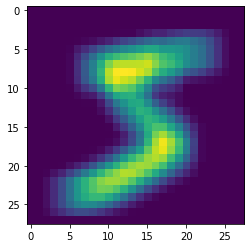

In [ ]:
plt.imshow(blur_img(X_train[0]))

In [5]:
#50%blur image, 50%clear image
X_train_blur=[]
X_test_blur=[]
for i in range(30000):
  X_train_blur.append(blur_img(X_train[i]))
for i in range(5000):
  X_test_blur.append(blur_img(X_test[i]))

In [6]:
X_train_dis = np.vstack((X_train_blur,X_train[30000:]))
X_test_dis = np.vstack((X_test_blur,X_test[5000:]))

In [7]:
X_train_dis = X_train_dis.astype('float32') / 255 
X_test_dis = X_test_dis.astype('float32') / 255
#X_train_dis = X_train_dis.reshape((len(X_train_dis), np.prod(X_train_dis.shape[1:])))
#X_test_dis = X_test_dis.reshape((len(X_test_dis), np.prod(X_test_dis.shape[1:])))

In [8]:
X_train_dis = X_train_dis.reshape((len(X_train_dis), np.prod(X_train_dis.shape[1:])))
X_test_dis = X_test_dis.reshape((len(X_test_dis), np.prod(X_test_dis.shape[1:])))

In [9]:
X_test_dis.shape

(10000, 784)

In [10]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [11]:
X_train = np.expand_dims(X_train, -1)
X_test=np.expand_dims(X_test, -1)

X_train_dis = np.expand_dims(X_train_dis, -1)
X_test_dis = np.expand_dims(X_test_dis, -1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
#y is for training the dis_net
y_train_dis=np.vstack([np.zeros((30000,1)),np.ones((30000,1))])
y_test_dis=np.vstack([np.zeros((5000,1)),np.ones((5000,1))])

In [13]:
num_classes=2
input_size = 784
y_train_dis = keras.utils.to_categorical(y_train_dis, num_classes)
y_test_dis = keras.utils.to_categorical(y_test_dis, num_classes)


#### Approcah 1. Training a new network dis_net to classify blur image and clean image, the dis_loss is the output of the prediction for each image
Haven't find a good way to get the dis_loss, if use the prediction result, it would return 1 for all blur image?

In [14]:
#dis_net
dis_net = keras.Sequential(
    [
     keras.Input(shape = input_size), 
     layers.Dense(512, activation='relu'),
     layers.Dropout(0.5),
     layers.BatchNormalization(),
     layers.Dense(256, activation='relu'),
     layers.Dropout(0.5),
     layers.BatchNormalization(),
     layers.Dense(128, activation='relu'),
     layers.Dropout(0.5),
     layers.BatchNormalization(),
     layers.Dense(64, activation='relu'),
     layers.Dropout(0.5),
     layers.BatchNormalization(),
     layers.Dense(32, activation='relu'),
     layers.Dropout(0.5),
     layers.BatchNormalization(),
     layers.Dense(2, activation='softmax'),
    ]
)
        

In [ ]:
dis_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

In [15]:
dis_net.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['binary_accuracy'])

In [16]:
batch_size=256
epochs=20
history = dis_net.fit(X_train_dis.reshape((len(X_train_dis), np.prod(X_train_dis.shape[1:]))), y_train_dis, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/20
211/211 [==============================] - 10s 36ms/step - loss: 0.2086 - binary_accuracy: 0.9471 - val_loss: 1.8113 - val_binary_accuracy: 0.2540
Epoch 2/20
211/211 [==============================] - 7s 34ms/step - loss: 0.0283 - binary_accuracy: 0.9985 - val_loss: 0.0489 - val_binary_accuracy: 0.9862
Epoch 3/20
211/211 [==============================] - 7s 33ms/step - loss: 0.0183 - binary_accuracy: 0.9974 - val_loss: 0.0496 - val_binary_accuracy: 0.9857
Epoch 4/20
211/211 [==============================] - 7s 33ms/step - loss: 0.0184 - binary_accuracy: 0.9961 - val_loss: 0.0515 - val_binary_accuracy: 0.9858
Epoch 5/20
211/211 [==============================] - 8s 38ms/step - loss: 0.0165 - binary_accuracy: 0.9962 - val_loss: 0.0096 - val_binary_accuracy: 0.9970
Epoch 6/20
211/211 [==============================] - 8s 39ms/step - loss: 0.0153 - binary_accuracy: 0.9968 - val_loss: 0.0286 - val_binary_accuracy: 0.9930
Epoch 7/20
211/211 [==============================] - 9s 

#### Approach 2 Custom loss function = mae(y_pred,y_clear)+mae(blur_input, y_pred)


Not sure how to interprate with input X(blur_input) with tf.mae function

In [ ]:
np_config.enable_numpy_behavior()
class CustomLoss(x):
    def __init__(self, regularization_factor=0.1, name="CustomLoss"):
        super().__init__(name=name)
        
    def call(self, y_true, y_pred):
        mae = keras.losses.MAE(y_true.reshape((len(y_true), np.prod(y_true.shape[1:]))), y_pred.reshape((len(y_pred), np.prod(y_pred.shape[1:]))))
        #dis = K.sum(dis_net(y_pred.reshape((len(y_pred), np.prod(y_pred.shape[1:]))))[:,0])
        dis = keras.losses.MAE(x, y_pred)
        #K.sum(y_pred, axis=[1,2,3])
        return dis

In [17]:
input_size = 784
hidden_size_1 = 256
hidden_size_2 = 16
bottleneck_size = 2
output_size = 784
x = Input(shape=(input_size,))
#print(x)

# Encoder
Encode_1 = Dense(hidden_size_1, activation='relu')(x)
Encode_2 = Dense(hidden_size_2, activation='relu')(Encode_1)
h = Dense(bottleneck_size, activation='linear')(Encode_2)
encoder_2 = Model(x, h)

# Decoder
encoded_input = Input(shape=(bottleneck_size,))
r = Dense(hidden_size_2, activation='relu')(encoded_input)
Decode_1 = Dense(hidden_size_1, activation='relu')(r)
Decode_2 = Dense(input_size, activation='sigmoid')(Decode_1)
decoder_2 = Model(encoded_input, Decode_2)

full = decoder_2(encoder_2(x))
autoencoder_new = Model(x, full)

autoencoder_new.compile(optimizer='adam', loss='mae')

In [18]:
# Fit data to model
import tensorflow as tf

batch_size=256
epochs=40
#model.fit(X_train_dis, X_train,batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test_dis, X_test))
autoencoder_new.fit(X_train_dis[:30000],X_train[:30000],batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test_dis[:5000], X_test[:5000]))

Epoch 1/40
118/118 [==============================] - 4s 26ms/step - loss: 33.5847 - val_loss: 31.1104
Epoch 2/40
118/118 [==============================] - 3s 23ms/step - loss: 33.5477 - val_loss: 31.1007
Epoch 3/40
118/118 [==============================] - 3s 24ms/step - loss: 33.5388 - val_loss: 31.0964
Epoch 4/40
118/118 [==============================] - 5s 39ms/step - loss: 33.5359 - val_loss: 31.0938
Epoch 5/40
118/118 [==============================] - 4s 33ms/step - loss: 33.5344 - val_loss: 31.0909
Epoch 6/40
118/118 [==============================] - 3s 23ms/step - loss: 33.5315 - val_loss: 31.0884
Epoch 7/40
118/118 [==============================] - 3s 23ms/step - loss: 33.5300 - val_loss: 31.0868
Epoch 8/40
118/118 [==============================] - 3s 22ms/step - loss: 33.5288 - val_loss: 31.0856
Epoch 9/40
118/118 [==============================] - 3s 23ms/step - loss: 33.5279 - val_loss: 31.0846
Epoch 10/40
118/118 [==============================] - 3s 22ms/step - los

In [19]:
#dimension=16
input_size = 784
hidden_size_1 = 256
hidden_size_2 = 128
bottleneck_size = 16
output_size = 784
x = Input(shape=(input_size,))

# Encoder
Encode_1 = Dense(hidden_size_1, activation='relu')(x)
Encode_2 = Dense(hidden_size_2, activation='relu')(Encode_1)
h = Dense(bottleneck_size, activation='linear')(Encode_2)
encoder_16 = Model(x, h)

# Decoder
encoded_input = Input(shape=(bottleneck_size,))
r = Dense(hidden_size_2, activation='relu')(encoded_input)
Decode_1 = Dense(hidden_size_1, activation='relu')(r)
Decode_2 = Dense(input_size, activation='sigmoid')(Decode_1)
decoder_16 = Model(encoded_input, Decode_2)

full = decoder_16(encoder_16(x))
autoencoder_16_new = Model(x, full)
autoencoder_16_new.compile(optimizer='adam', loss='mae')

In [20]:
autoencoder_16_new.fit(X_train_dis[:30000],X_train[:30000],batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test_dis[:5000], X_test[:5000]))

Epoch 1/40
118/118 [==============================] - 4s 27ms/step - loss: 33.5770 - val_loss: 31.1105
Epoch 2/40
118/118 [==============================] - 3s 27ms/step - loss: 33.5508 - val_loss: 31.1107
Epoch 3/40
118/118 [==============================] - 3s 27ms/step - loss: 33.5505 - val_loss: 31.1102
Epoch 4/40
118/118 [==============================] - 3s 27ms/step - loss: 33.5500 - val_loss: 31.1091
Epoch 5/40
118/118 [==============================] - 3s 26ms/step - loss: 33.5488 - val_loss: 31.1069
Epoch 6/40
118/118 [==============================] - 3s 26ms/step - loss: 33.5443 - val_loss: 31.1005
Epoch 7/40
118/118 [==============================] - 3s 26ms/step - loss: 33.5407 - val_loss: 31.0980
Epoch 8/40
118/118 [==============================] - 3s 26ms/step - loss: 33.5363 - val_loss: 31.0888
Epoch 9/40
118/118 [==============================] - 3s 27ms/step - loss: 33.5296 - val_loss: 31.0825
Epoch 10/40
118/118 [==============================] - 3s 25ms/step - los

In [21]:
#dimension=256
x = Input(shape=(input_size,))

# Encoder
Encode_1 = Dense(hidden_size_1, activation='relu')(x)
h = Dense(bottleneck_size, activation='linear')(Encode_1)
encoder_256 = Model(x, h)

# Decoder
encoded_input = Input(shape=(bottleneck_size,))
r = Dense(hidden_size_1, activation='relu')(encoded_input)
Decode_1 = Dense(input_size, activation='sigmoid')(r)
decoder_256 = Model(encoded_input, Decode_1)

full = decoder_256(encoder_256(x))
autoencoder_256_new = Model(x, full)
autoencoder_256_new.compile(optimizer='adam', loss='mae')

In [22]:
autoencoder_256_new.fit(X_train_dis[:30000],X_train[:30000],batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test_dis[:5000], X_test[:5000]))

Epoch 1/40
118/118 [==============================] - 3s 24ms/step - loss: 33.5794 - val_loss: 31.1039
Epoch 2/40
118/118 [==============================] - 3s 22ms/step - loss: 33.5406 - val_loss: 31.0954
Epoch 3/40
118/118 [==============================] - 3s 23ms/step - loss: 33.5319 - val_loss: 31.0867
Epoch 4/40
118/118 [==============================] - 3s 23ms/step - loss: 33.5229 - val_loss: 31.0750
Epoch 5/40
118/118 [==============================] - 3s 22ms/step - loss: 33.5141 - val_loss: 31.0687
Epoch 6/40
118/118 [==============================] - 3s 22ms/step - loss: 33.5081 - val_loss: 31.0629
Epoch 7/40
118/118 [==============================] - 3s 23ms/step - loss: 33.5011 - val_loss: 31.0545
Epoch 8/40
118/118 [==============================] - 3s 22ms/step - loss: 33.4932 - val_loss: 31.0476
Epoch 9/40
118/118 [==============================] - 3s 22ms/step - loss: 33.4871 - val_loss: 31.0413
Epoch 10/40
118/118 [==============================] - 3s 22ms/step - los

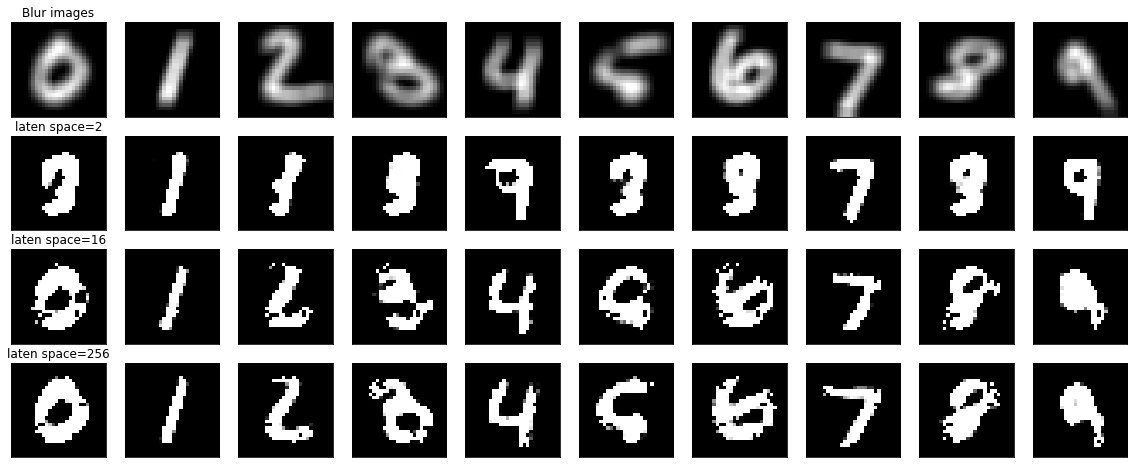

In [43]:
n = 10
plt.figure(figsize=(20, 8))
reconstructed_imgs_2 = autoencoder_new.predict(X_test_dis)
reconstructed_imgs_16_new = autoencoder_16_new.predict(X_test_dis)
reconstructed_imgs_256_new = autoencoder_256_new.predict(X_test_dis)
def plot_image(data):
    plt.imshow(data.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
for i in range(n):
    # display original
    index=0
    for index in range(len(y_test)):
      if y_test[index]==i:
        ax = plt.subplot(4, n, i+1)
        plot_image(X_test_dis[index])
        if i==0:ax.set_title('Blur images')

        #display reconstruction image of laten space=2
        ax = plt.subplot(4, n, i+n+1)
        plot_image(reconstructed_imgs_2[index])
        if i==0:ax.set_title('laten space=2')
        #display reconstruction image of laten space=16
        ax = plt.subplot(4, n, i+2*n+1)
        plot_image(reconstructed_imgs_16_new[index])
        if i==0:ax.set_title('laten space=16')

        #display reconstruction image of laten space=256
        ax = plt.subplot(4, n, i+3*n+1)
        plot_image(reconstructed_imgs_256_new[index])
        if i==0:ax.set_title('laten space=256')
       
        break

plt.show()

In [ ]:
autoencoder_new.layers[0].output

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'input_79')>

In [44]:
y_pred_2=dis_net.predict(reconstructed_imgs_2)
y_pred_16=dis_net.predict(reconstructed_imgs_16_new)
y_pred_256=dis_net.predict(reconstructed_imgs_256_new)

In [45]:
for i in range(len(y_pred_2)):
    y_pred_2[i][np.argmax(y_pred_2[i])]=1.0
    y_pred_2[i][np.argmin(y_pred_2[i])]=0.0
    y_pred_16[i][np.argmax(y_pred_16[i])]=1.0
    y_pred_16[i][np.argmin(y_pred_16[i])]=0.0
    y_pred_256[i][np.argmax(y_pred_256[i])]=1.0
    y_pred_256[i][np.argmin(y_pred_256[i])]=0.0

In [46]:
len(y_pred_2)

10000

In [ ]:
from keras.utils import np_utils
import pandas
#y_pred_2=np_utils.to_categorical(y_pred_2, 2)
#y_pred_256[:100]
from sklearn.metrics import accuracy_score
pandas.get_dummies(y_pred_2)

In [64]:
y_pred_2= np.argmax(y_pred_2, axis=-1)  
y_pred_16= np.argmax(y_pred_16, axis=-1)  
y_pred_256= np.argmax(y_pred_256, axis=-1)  

In [67]:
print(list(set(y_pred_256)),list(set(y_pred_16)),list(set(y_pred_2)))

[1] [1] [1]
